In [1]:
!pip install -U tensorflow_datasets

  Created wheel for promise: filename=promise-2.3-cp37-none-any.whl size=21500 sha256=1fd1d0154da23faba874d93c278b17e5b239526865ff10f793babd46e6f72b7b
  Stored in directory: C:\Users\Anshul\AppData\Local\pip\Cache\wheels\19\49\34\c3c1e78bcb954c49e5ec0d31784fe63d14d427f316b12fbde9
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78598 sha256=ee58337a94b55464d025508c1c35e57d75cd537ae528db4b17480075ccebe3f3
  Stored in directory: C:\Users\Anshul\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.51.0-cp37-none-any.whl size=77604 sha256=baebcef919445fe685ea0fa8e21488296f32cdc02f9632c99a3da69481eb400c
  Stored in directory: C:\Users\Anshul\AppData\Local\pip\Cache\wheels\2c\f9\7f\6eb87e636072bf467e25348bbeb96849333e6a080dca78f706
Successfully built promise dill googleapis-common-protos


In [14]:
import tensorflow as tf
#cfg = tf.compat.v1.ConfigProto(allow_soft_placement=True )
#cfg.gpu_options.allow_growth = True
tf.__version__

'2.0.0'

In [15]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [17]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [19]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [20]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

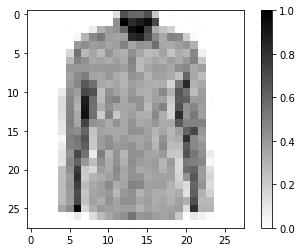

In [21]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

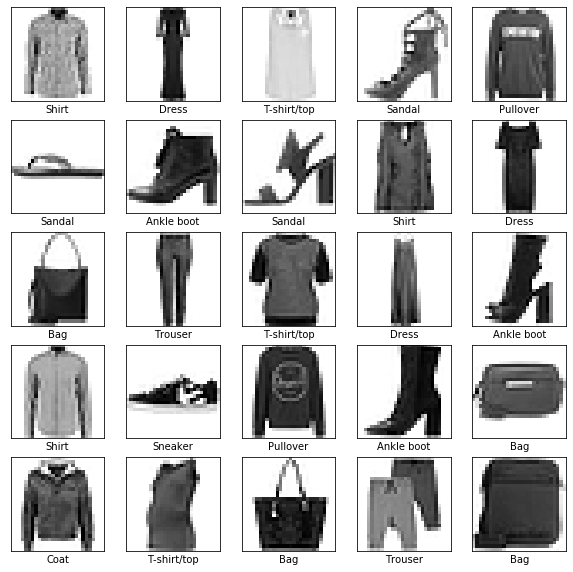

In [22]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(728, activation=tf.nn.relu),
    tf.keras.layers.Dense(728, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [27]:
history = model.fit(train_dataset, epochs=5 , verbose=True , steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - ETA: 2:54:35 - loss: 2.4496 - accuracy: 0.062 - ETA: 12:29 - loss: 1.5589 - accuracy: 0.4643  - ETA: 6:44 - loss: 1.2402 - accuracy: 0.562 - ETA: 4:37 - loss: 1.1156 - accuracy: 0.60 - ETA: 3:31 - loss: 1.0586 - accuracy: 0.62 - ETA: 2:54 - loss: 0.9973 - accuracy: 0.64 - ETA: 2:27 - loss: 0.9522 - accuracy: 0.65 - ETA: 2:07 - loss: 0.9049 - accuracy: 0.67 - ETA: 1:52 - loss: 0.8630 - accuracy: 0.69 - ETA: 1:41 - loss: 0.8393 - accuracy: 0.70 - ETA: 1:31 - loss: 0.8164 - accuracy: 0.71 - ETA: 1:24 - loss: 0.8031 - accuracy: 0.71 - ETA: 1:17 - loss: 0.7822 - accuracy: 0.72 - ETA: 1:11 - loss: 0.7643 - accuracy: 0.72 - ETA: 1:06 - loss: 0.7502 - accuracy: 0.73 - ETA: 1:02 - loss: 0.7388 - accuracy: 0.73 - ETA: 59s - loss: 0.7309 - accuracy: 0.7379 - ETA: 55s - loss: 0.7166 - accuracy: 0.743 - ETA: 52s - loss: 0.7081 - accuracy: 0.745 - ETA: 50s - loss: 0.6997 - accuracy: 0.747 - ETA: 47s - loss: 0.6932 - accuracy

1875/1875 [==============================] - ETA: 18s - loss: 0.4060 - accuracy: 0.875 - ETA: 9s - loss: 0.3395 - accuracy: 0.890 - ETA: 9s - loss: 0.3264 - accuracy: 0.88 - ETA: 9s - loss: 0.3353 - accuracy: 0.87 - ETA: 8s - loss: 0.3376 - accuracy: 0.87 - ETA: 8s - loss: 0.3517 - accuracy: 0.87 - ETA: 8s - loss: 0.3624 - accuracy: 0.86 - ETA: 8s - loss: 0.3683 - accuracy: 0.86 - ETA: 8s - loss: 0.3701 - accuracy: 0.85 - ETA: 8s - loss: 0.3703 - accuracy: 0.86 - ETA: 8s - loss: 0.3788 - accuracy: 0.85 - ETA: 8s - loss: 0.3761 - accuracy: 0.85 - ETA: 8s - loss: 0.3701 - accuracy: 0.86 - ETA: 8s - loss: 0.3700 - accuracy: 0.86 - ETA: 8s - loss: 0.3696 - accuracy: 0.86 - ETA: 8s - loss: 0.3684 - accuracy: 0.86 - ETA: 7s - loss: 0.3663 - accuracy: 0.86 - ETA: 7s - loss: 0.3651 - accuracy: 0.86 - ETA: 7s - loss: 0.3663 - accuracy: 0.86 - ETA: 7s - loss: 0.3660 - accuracy: 0.86 - ETA: 7s - loss: 0.3660 - accuracy: 0.86 - ETA: 7s - loss: 0.3682 - accuracy: 0.86 - ETA: 7s - loss: 0.3658 - acc

1875/1875 [==============================] - ETA: 18s - loss: 0.3950 - accuracy: 0.875 - ETA: 9s - loss: 0.3761 - accuracy: 0.849 - ETA: 9s - loss: 0.3721 - accuracy: 0.84 - ETA: 8s - loss: 0.3668 - accuracy: 0.85 - ETA: 8s - loss: 0.3629 - accuracy: 0.86 - ETA: 8s - loss: 0.3526 - accuracy: 0.86 - ETA: 8s - loss: 0.3555 - accuracy: 0.86 - ETA: 8s - loss: 0.3445 - accuracy: 0.86 - ETA: 8s - loss: 0.3424 - accuracy: 0.86 - ETA: 8s - loss: 0.3309 - accuracy: 0.87 - ETA: 8s - loss: 0.3313 - accuracy: 0.87 - ETA: 8s - loss: 0.3328 - accuracy: 0.87 - ETA: 8s - loss: 0.3323 - accuracy: 0.87 - ETA: 8s - loss: 0.3296 - accuracy: 0.87 - ETA: 7s - loss: 0.3343 - accuracy: 0.87 - ETA: 7s - loss: 0.3341 - accuracy: 0.87 - ETA: 7s - loss: 0.3324 - accuracy: 0.87 - ETA: 7s - loss: 0.3301 - accuracy: 0.87 - ETA: 7s - loss: 0.3286 - accuracy: 0.87 - ETA: 7s - loss: 0.3271 - accuracy: 0.87 - ETA: 7s - loss: 0.3280 - accuracy: 0.87 - ETA: 7s - loss: 0.3284 - accuracy: 0.87 - ETA: 7s - loss: 0.3299 - acc

1875/1875 [==============================] - ETA: 18s - loss: 0.3484 - accuracy: 0.812 - ETA: 9s - loss: 0.2792 - accuracy: 0.901 - ETA: 9s - loss: 0.2926 - accuracy: 0.89 - ETA: 9s - loss: 0.2917 - accuracy: 0.89 - ETA: 8s - loss: 0.2950 - accuracy: 0.89 - ETA: 8s - loss: 0.2996 - accuracy: 0.88 - ETA: 8s - loss: 0.3120 - accuracy: 0.88 - ETA: 8s - loss: 0.3189 - accuracy: 0.88 - ETA: 8s - loss: 0.3143 - accuracy: 0.88 - ETA: 8s - loss: 0.3119 - accuracy: 0.88 - ETA: 8s - loss: 0.3121 - accuracy: 0.88 - ETA: 8s - loss: 0.3038 - accuracy: 0.88 - ETA: 8s - loss: 0.3041 - accuracy: 0.88 - ETA: 8s - loss: 0.3044 - accuracy: 0.88 - ETA: 8s - loss: 0.3102 - accuracy: 0.88 - ETA: 8s - loss: 0.3078 - accuracy: 0.88 - ETA: 7s - loss: 0.3043 - accuracy: 0.88 - ETA: 7s - loss: 0.3045 - accuracy: 0.88 - ETA: 7s - loss: 0.3033 - accuracy: 0.89 - ETA: 7s - loss: 0.3043 - accuracy: 0.88 - ETA: 7s - loss: 0.3070 - accuracy: 0.88 - ETA: 7s - loss: 0.3050 - accuracy: 0.88 - ETA: 7s - loss: 0.3048 - acc

1875/1875 [==============================] - ETA: 16s - loss: 0.2794 - accuracy: 0.906 - ETA: 9s - loss: 0.2669 - accuracy: 0.915 - ETA: 8s - loss: 0.2547 - accuracy: 0.91 - ETA: 8s - loss: 0.2709 - accuracy: 0.90 - ETA: 8s - loss: 0.2689 - accuracy: 0.90 - ETA: 8s - loss: 0.2695 - accuracy: 0.90 - ETA: 8s - loss: 0.2717 - accuracy: 0.90 - ETA: 8s - loss: 0.2683 - accuracy: 0.90 - ETA: 8s - loss: 0.2658 - accuracy: 0.90 - ETA: 8s - loss: 0.2648 - accuracy: 0.90 - ETA: 8s - loss: 0.2583 - accuracy: 0.90 - ETA: 8s - loss: 0.2650 - accuracy: 0.90 - ETA: 8s - loss: 0.2623 - accuracy: 0.90 - ETA: 8s - loss: 0.2611 - accuracy: 0.90 - ETA: 8s - loss: 0.2639 - accuracy: 0.90 - ETA: 8s - loss: 0.2672 - accuracy: 0.89 - ETA: 8s - loss: 0.2730 - accuracy: 0.89 - ETA: 8s - loss: 0.2776 - accuracy: 0.89 - ETA: 8s - loss: 0.2773 - accuracy: 0.89 - ETA: 8s - loss: 0.2778 - accuracy: 0.89 - ETA: 8s - loss: 0.2779 - accuracy: 0.89 - ETA: 8s - loss: 0.2789 - accuracy: 0.89 - ETA: 8s - loss: 0.2799 - acc

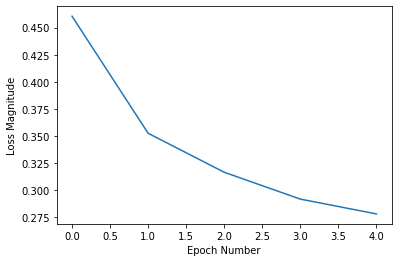

In [28]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

In [30]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - ETA: 1s - loss: 0.4056 - accuracy: 0.87 - ETA: 1s - loss: 0.3083 - accuracy: 0.88 - ETA: 0s - loss: 0.3437 - accuracy: 0.86 - ETA: 0s - loss: 0.3370 - accuracy: 0.87 - ETA: 0s - loss: 0.3463 - accuracy: 0.87 - ETA: 0s - loss: 0.3396 - accuracy: 0.87 - ETA: 0s - loss: 0.3370 - accuracy: 0.87 - ETA: 0s - loss: 0.3341 - accuracy: 0.87 - ETA: 0s - loss: 0.3402 - accuracy: 0.87 - ETA: 0s - loss: 0.3394 - accuracy: 0.87 - ETA: 0s - loss: 0.3355 - accuracy: 0.87 - ETA: 0s - loss: 0.3340 - accuracy: 0.88 - ETA: 0s - loss: 0.3368 - accuracy: 0.87 - ETA: 0s - loss: 0.3393 - accuracy: 0.87 - ETA: 0s - loss: 0.3406 - accuracy: 0.87 - ETA: 0s - loss: 0.3444 - accuracy: 0.87 - ETA: 0s - loss: 0.3433 - accuracy: 0.87 - ETA: 0s - loss: 0.3477 - accuracy: 0.87 - ETA: 0s - loss: 0.3484 - accuracy: 0.87 - ETA: 0s - loss: 0.3483 - accuracy: 0.87 - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8781
Accuracy on test dataset: 0.8781


In [31]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.8781


In [32]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [33]:
predictions.shape


(32, 10)

In [34]:
predictions[0]

array([7.8398307e-06, 2.9347946e-09, 1.3518777e-02, 1.0437140e-06,
       9.6950710e-02, 7.0003305e-09, 8.8952106e-01, 6.7206529e-10,
       5.1641285e-07, 2.7891955e-09], dtype=float32)

In [35]:
np.argmax(predictions[0])

6

In [36]:
test_labels[0]

6

In [37]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

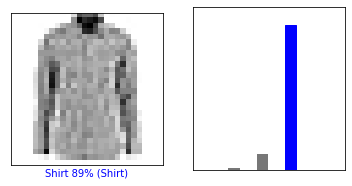

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

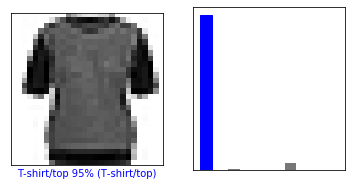

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

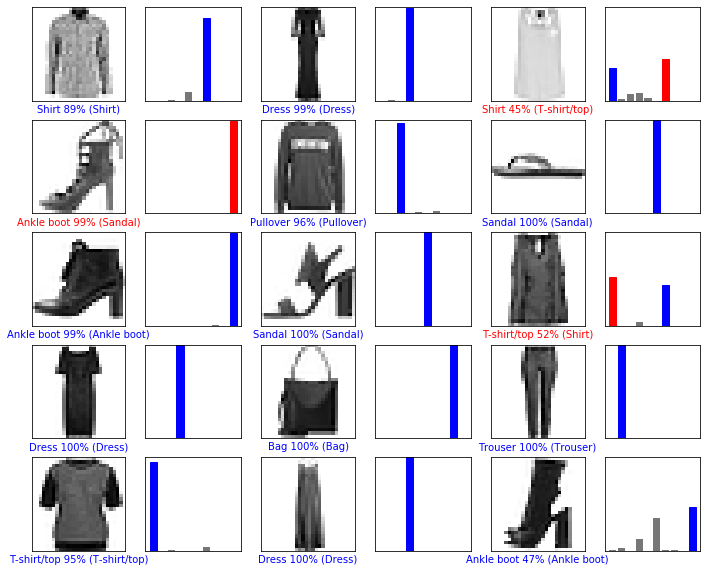

In [40]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [41]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [42]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [43]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.8398307e-06 2.9347946e-09 1.3518783e-02 1.0437159e-06 9.6950710e-02
  7.0003305e-09 8.8952106e-01 6.7206407e-10 5.1641229e-07 2.7891902e-09]]


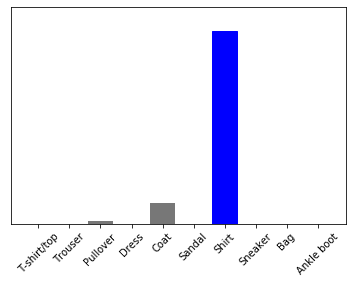

In [44]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [45]:
np.argmax(predictions_single[0])

6